<a href="https://colab.research.google.com/github/RajkumarShenigaram/LoanEligibilityPrediction/blob/main/Predicting_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Classification - Loan Eligibility Prediction

Welcome to the project on classification. We will use the credit risk dataset for this problem.

----------------
## Context:
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses.

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan.

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands)
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

#### Loading data

In [ ]:
# data = pd.read_csv("CreditRisk.csv")
# data.head()

import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In the customers data we have 13 columns.

* **Categorical variables: Loan_ID, Gender, Married, Dependents, Education, Self_employed**

* **Quantitative Variables: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_term, Credit_History, Property_Area, Loan_Status**

We can also see that the total count of values present in each field is not same giving a clue for null values (will be checked in the nest part of code).
Also, the Loan Status is the the variable to be predicted.


In [ ]:
# Counting null values
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [ ]:
# Count unique values
data.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,10


Loan_ID is the primary key in the data set, it can be removed from analysis

Action to be taken of the field with null values. Some data related to (Gender, Married, Dependents, Self_Employed) and (Loan_Amount, Credit_History) is missing.

In [ ]:
data=data.drop('Loan_ID', axis=1)
Categorical_Variables = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Numerical_Variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

The missing values in the data sets is not high. Less than 10% of the data is missing so we can delete the rows for our data to be uniform.

In [ ]:
data[Numerical_Variables].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0


The applicant income is widespread.

The co applicant income has many zeroes (>25%)

The Loan Amount is right skewed with more than 75% taking less than $165k.

Loan Amount Term is 1 year to 40 years and more than 50% records have it equal to 30 years.

The next part of code gives graphical depiction of both numerical and categorical variables

# Distribution of Numberical Variables

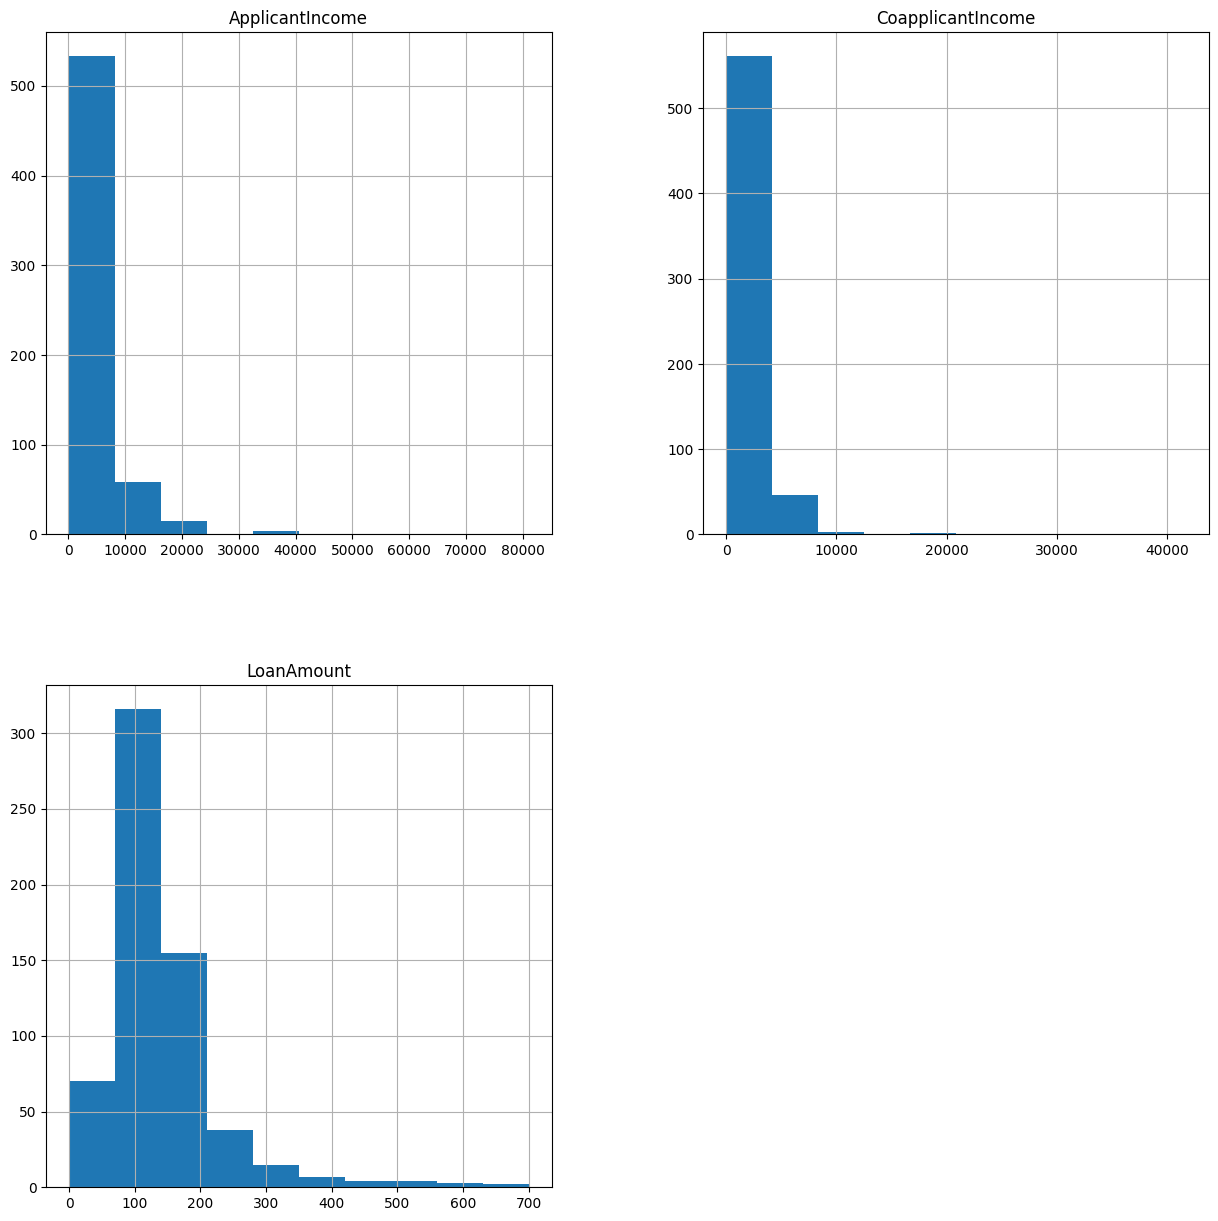

In [ ]:
data[Numerical_Variables].hist(figsize=(15,15))
plt.show()

In [ ]:
#Printing the % sub categories of each category
for i in Categorical_Variables:
    print(data[i].value_counts(normalize=True)) # This expresses the results as proportions rather than counts.
    print('*'*100)

Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64
****************************************************************************************************
Dependents
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: proportion, dtype: float64
****************************************************************************************************
Married
Yes    0.651391
No     0.348609
Name: proportion, dtype: float64
****************************************************************************************************
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64
****************************************************************************************************
Self_Employed
No     0.859107
Yes    0.140893
Name: proportion, dtype: float64
****************************************************************************************************
Loan_Amount_Term
360.0    0.853333
180.0    0.073333
480.0    0.0250

#Visuals for each categorical variable

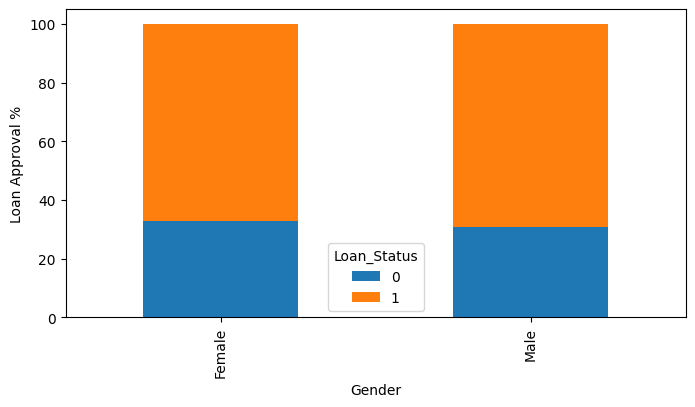

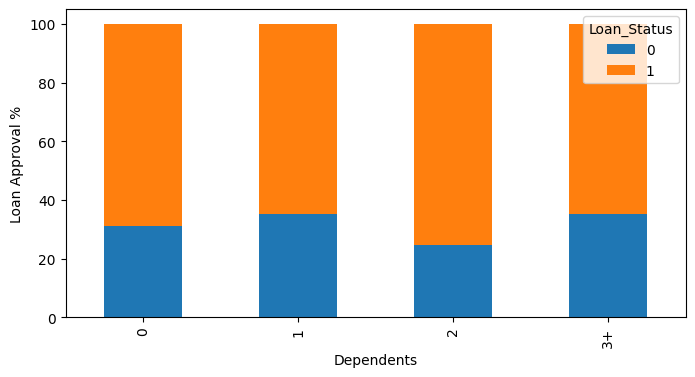

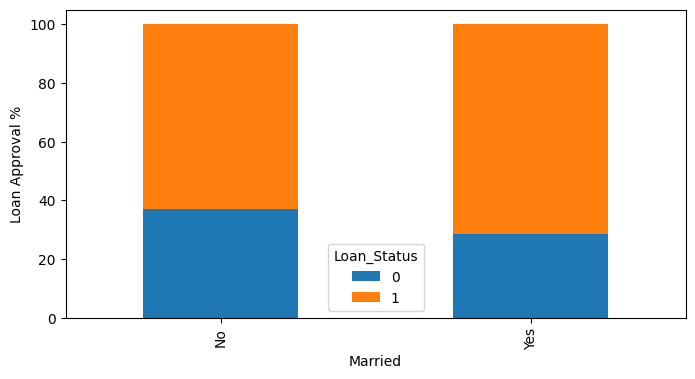

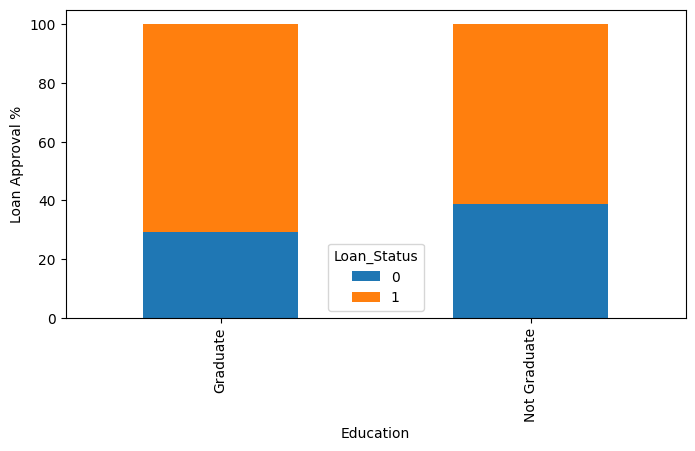

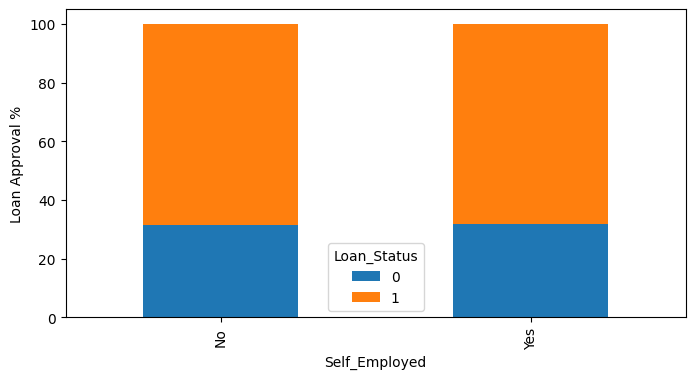

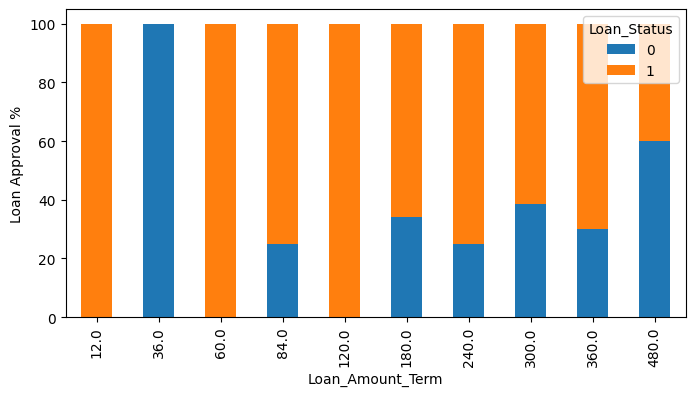

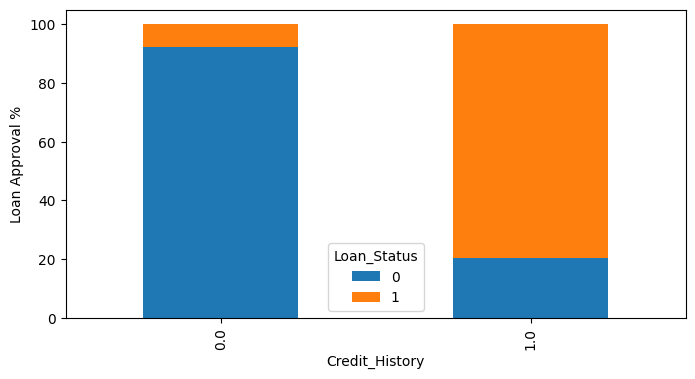

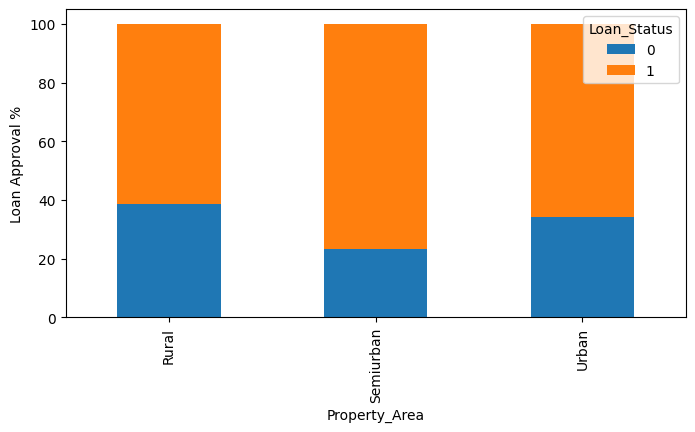

In [ ]:
#Plots for categorical columns
for i in Categorical_Variables:
    if i!='Loan_Status':
        (pd.crosstab(data[i],data['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Loan Approval %')

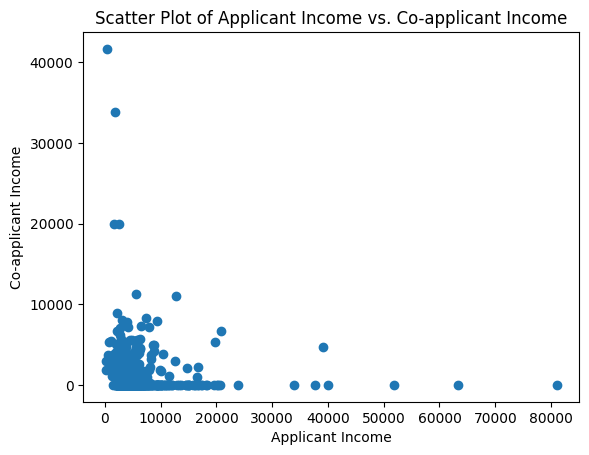

In [ ]:
# Create the scatter plot
plt.scatter(data['ApplicantIncome'], data['CoapplicantIncome'])

# Add labels and title
plt.title('Scatter Plot of Applicant Income vs. Co-applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Co-applicant Income')

# Show the plot
plt.show()

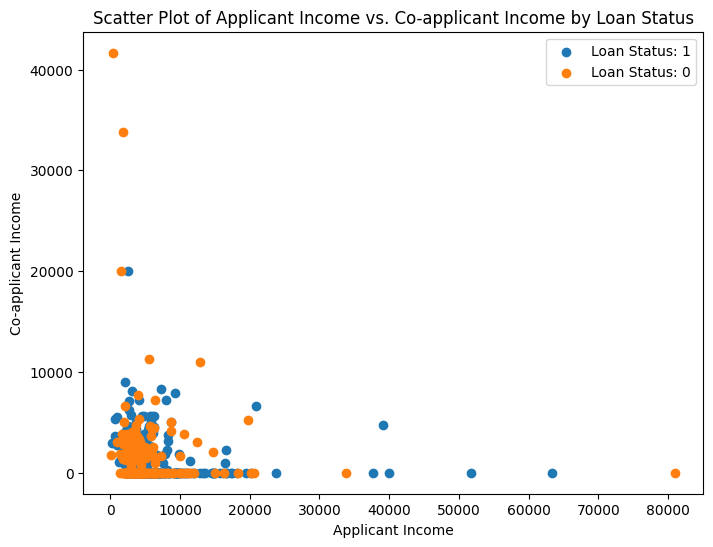

In [ ]:
plt.figure(figsize=(8, 6))
for status in data['Loan_Status'].unique():
    subset = data[data['Loan_Status'] == status]
    plt.scatter(subset['ApplicantIncome'], subset['CoapplicantIncome'], label=f'Loan Status: {status}')

# Add labels and title
plt.title('Scatter Plot of Applicant Income vs. Co-applicant Income by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Co-applicant Income')
plt.legend()

# Handling the missing value records

As the missing values are less than 20% we can delete the records

In [ ]:
#data.dropna(how='any', inplace=True)

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

#Data info after dropping null values
data.info()
data.isnull().sum()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    int64  
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 57.7+ KB


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


# Correlation between the variables

<Axes: >

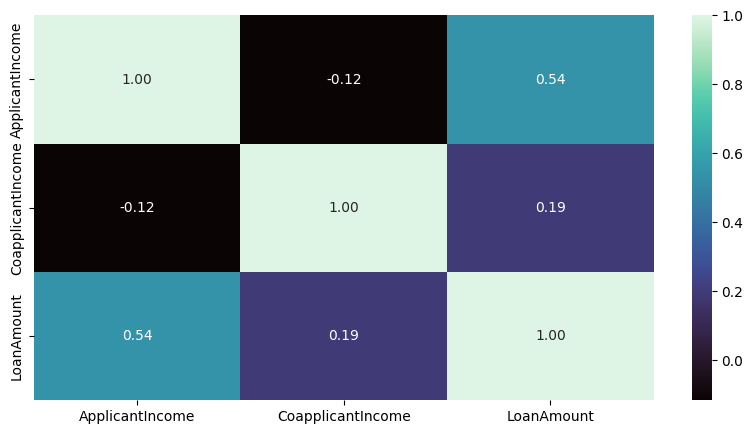

In [ ]:
#Correlation matrix for Quantitative data
plt.figure(figsize=(10,5))
sns.heatmap(data[Numerical_Variables].corr(),annot=True, fmt='0.2f', cmap='mako')

No two quantitative variables are highly correlated

We are creating a new column of Total income of the applicant which is the sum of applicant income and coapplicant income.

In [ ]:
# Total Applicant Income
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1,6000.0


As the graphs for Quantitative variables are highly right skewed, we use log function to remove the skweness.

<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

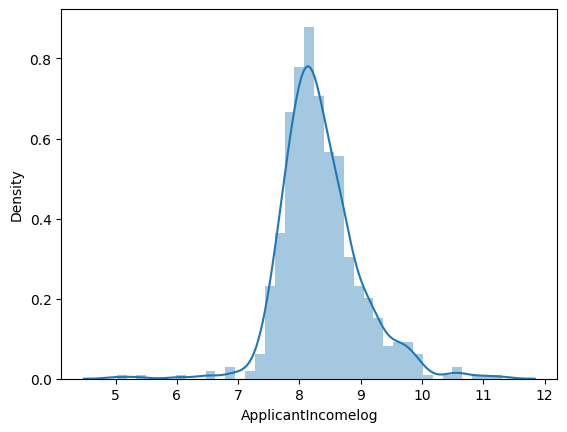

In [ ]:
# Apply Log Transformation for Application Imcome

data['ApplicantIncomelog'] = np.log(data['ApplicantIncome'] + 1)
sns.distplot(data['ApplicantIncomelog'])

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

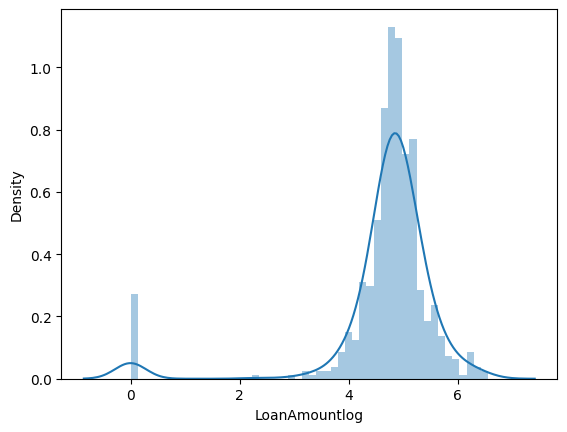

In [ ]:
# Apply Log Transformation for Loan Amount
data['LoanAmountlog'] = np.log(data['LoanAmount'] + 1)
sns.distplot(data['LoanAmountlog'])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

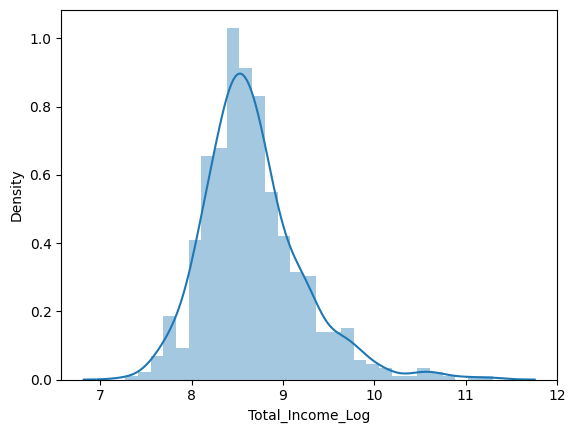

In [ ]:
# Apply Log Transformation for Coapplicant Income
data['Total_Income_Log'] = np.log(data['Total_Income'] + 1)
sns.distplot(data['Total_Income_Log'])

As we have log of quantitative variables we will remove the unncessary columns.

In [ ]:
# drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Total_Income']
data = data.drop(columns = cols, axis = 1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Total_Income_Log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,1,8.674197,0.000000,8.674197
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0,8.430327,4.859812,8.714732
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1,8.006701,4.204693,8.006701
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1,7.857094,4.795791,8.505525
4,Male,No,0,Graduate,No,360.0,1.0,Urban,1,8.699681,4.955827,8.699681


#Converting categorical variables into numerical values using dummy variables

In [ ]:
#Creating Dummies for Categorical Variables
Cat_Into_Dummies = ['Gender', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Property_Area']
data = pd.get_dummies(data, columns=Cat_Into_Dummies, drop_first=False)
#The "married" column data can be simplified by converting "Yes" to 1 and "No" to 0, rather than creating separate columns for each option. This avoids redundant filling of 1s and 0s in additional columns.
married_conv = {'Yes': 1, 'No': 0}
data['Married'] = data['Married'].map(married_conv)

#Separating the independent variables (X) and the dependent variable (Y)

In [ ]:
#Separating target variable and other independent variables
Y= data.Loan_Status
X= data.drop(columns = ['Loan_Status'])

#Data Scaling

In [ ]:
#Data scaling using Standard Scaler method
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

#Splitting of Train data set and test data set

In [ ]:
#Splitting data for test and train (70% train and 30% test)
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1,stratify=Y)

#Function to calculate and print the classification report and confusion matrix

In [ ]:
#creating the metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    Confm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(Confm, annot=True,  fmt='.2f', cmap ='mako', xticklabels=['Loan_Status_N', 'Loan_Status_Y'], yticklabels=['Loan_Status_N', 'Loan_Status_Y'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#**Decision Tree Classifier Model**

In [ ]:
# Create Decision Tree classifer object
Loan_tree = DecisionTreeClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

# Train Decision Tree Classifer
Loan_tree = Loan_tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = Loan_tree.predict(x_test)

#Model Performance on Train dataset


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       295

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



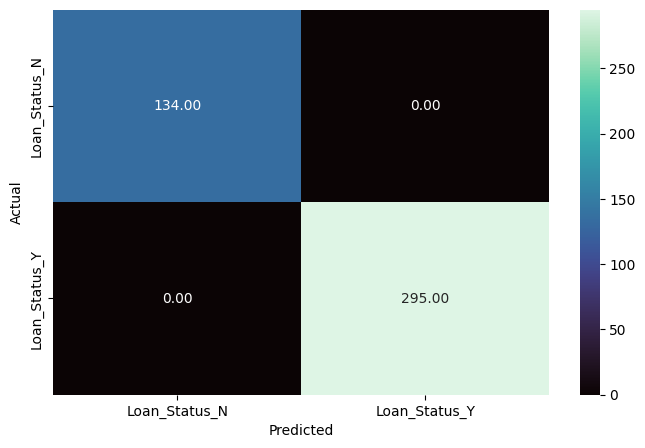

In [ ]:
#Model performace on training data
y_pred_train_Loan = Loan_tree.predict(x_train)
metrics_score(y_train, y_pred_train_Loan)

The results from the decision tree classifier show excellent performance on the training data, with perfect precision, recall, and F1-score for both classes, leading to an overall accuracy of 100%. However, these exceptional results could be a sign of overfitting, especially if the model hasn't been tested on an independent validation dataset. Overfitting occurs when a model learns the training data too well, capturing noise and outliers that may not generalize well to new, unseen data. Therefore, it's crucial to evaluate the model's performance on a separate test dataset to ensure its reliability and generalization ability.

#Model Performace on Test dataset

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        58
           1       0.83      0.79      0.81       127

    accuracy                           0.74       185
   macro avg       0.70      0.71      0.71       185
weighted avg       0.75      0.74      0.74       185



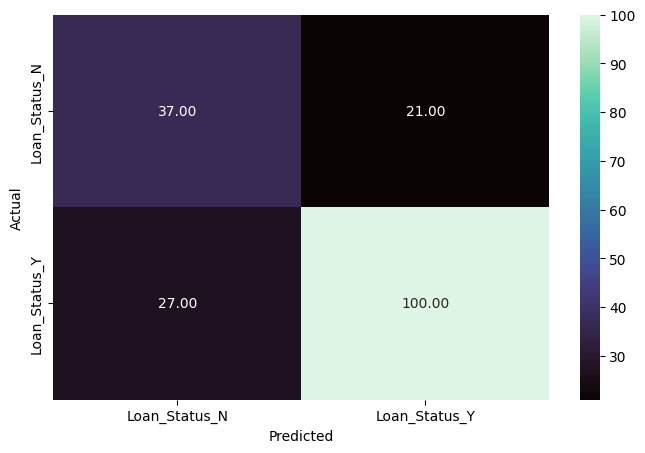

In [ ]:
y_pred_test_Loan = Loan_tree.predict(x_test)
metrics_score(y_test, y_pred_test_Loan)

The model achieves a moderate accuracy of 74% on the Test data. Upon analyzing the confusion matrix results of the test and training data, it's evident that the model's accuracy is lower on the test dataset than the training dataset.

This difference indicates potential overfitting, where the model performs well on the training data but has difficulty generalizing to new, unseen data. To mitigate this overfitting issue, we can utilize hyperparameter tuning techniques.

#Decision Tree Hyperparamter Tuning

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Performance on Training Data:
              precision    recall  f1-score   support

           0       1.00      0.41      0.58       134
           1       0.79      1.00      0.88       295

    accuracy                           0.82       429
   macro avg       0.89      0.71      0.73       429
weighted avg       0.85      0.82      0.79       429



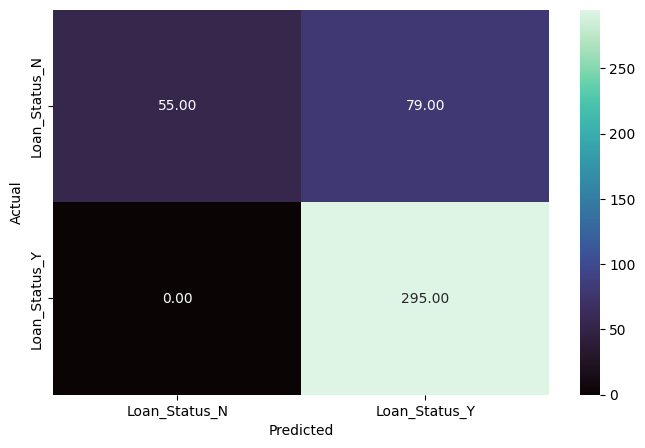

Performance on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.33      0.49        58
           1       0.77      1.00      0.87       127

    accuracy                           0.79       185
   macro avg       0.88      0.66      0.68       185
weighted avg       0.84      0.79      0.75       185



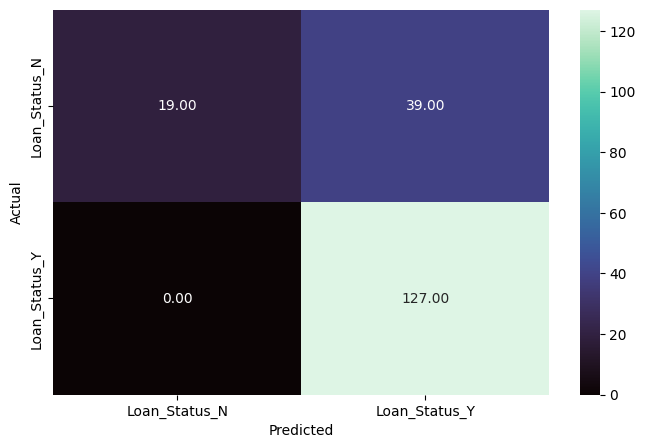

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create Decision Tree classifer object with hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

# Set the clf to the best combination of parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train Decision Tree Classifer with the best hyperparameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(x_train, y_train)

# Checking performance on the training data
print("Performance on Training Data:")
y_pred_train_best = best_dt_model.predict(x_train)
metrics_score(y_train, y_pred_train_best)

# Checking performance on the test dataset
print("Performance on Test Data:")
y_pred_test_best = best_dt_model.predict(x_test)
metrics_score(y_test, y_pred_test_best)

The hyperparameter tuning notably enhanced the model's performance, as indicated by the improvements in accuracy (79%), precision, recall, and F1-score for both classes. Overall, this successfully addressed the overfitting issue and led to a more balanced and accurate Decision Tree model on the test data.

#Let's plot the feature importance and check the most important features:

<Axes: xlabel='Importance', ylabel='None'>

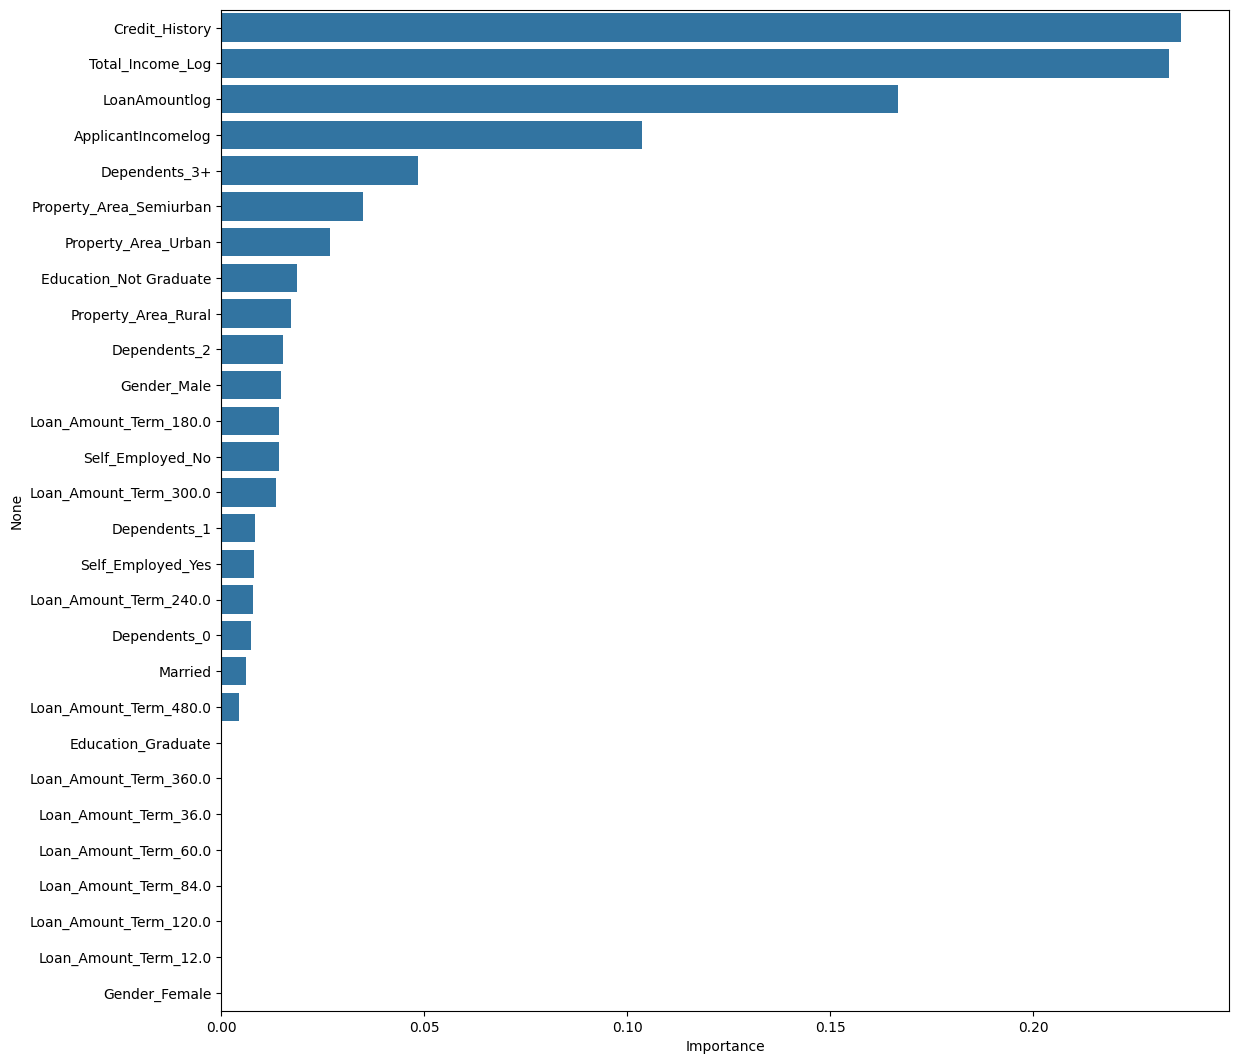

In [ ]:
#plotting the importance plot
importances = Loan_tree.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

The most important features, according to the model, are Applicant Income, Credit History, Loan Amount, Coapplicant Income, and Loan Amount Term. This makes sense, as a person's ability to repay a loan likely depends on their income, credit history, the amount of the loan, their spouse's income, and the length of the loan term.

#**Model 2: Logistic Regression Model**

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.86      0.46      0.60       134
           1       0.80      0.97      0.87       295

    accuracy                           0.81       429
   macro avg       0.83      0.71      0.74       429
weighted avg       0.82      0.81      0.79       429



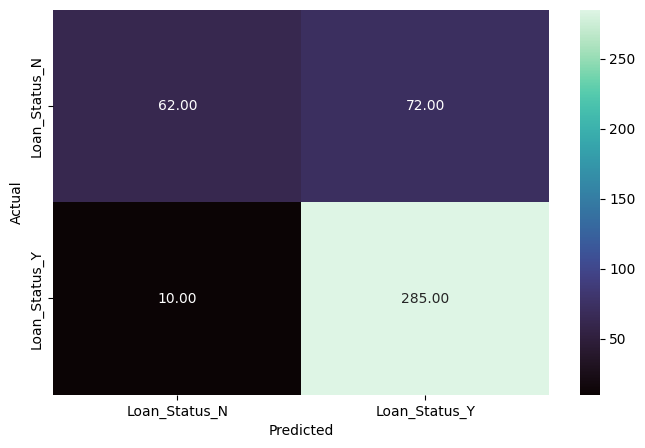

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.41      0.56        58
           1       0.78      0.97      0.87       127

    accuracy                           0.79       185
   macro avg       0.82      0.69      0.71       185
weighted avg       0.81      0.79      0.77       185



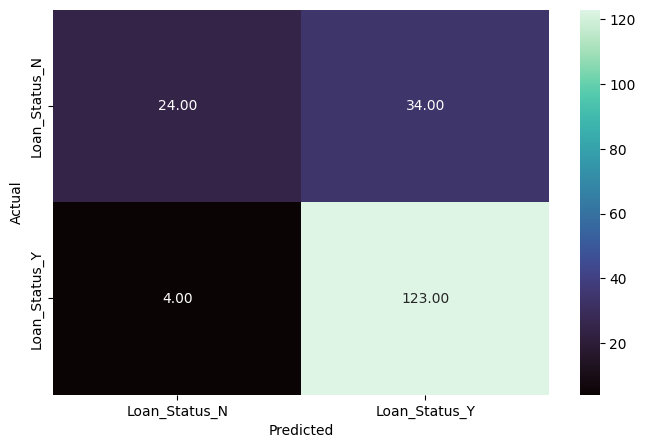

In [ ]:
#logistic regression model - Instantiate the model
lg=LogisticRegression()

# Train the model
lg.fit(x_train,y_train)

# Checking the performance on the training data
print("Performance on Training Data:")
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

# Checking the performance on the test dataset
print("Performance on Test Data:")
y_pred_test = lg.predict(x_test)
metrics_score(y_test,y_pred_test)

The model achieves an accuracy of 81% on both the training and 79% on test data, indicating a reasonable level of predictive performance.This suggests that the model can classify loan applications correctly in the majority of cases. Considering the balanced performance metrics and accuracy, this logistic regression model appears to be reasonably effective for loan approval decision-making

#Hyperparameter tuning on Logistic regression model

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Performance of Best Model on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.41      0.59        58
           1       0.79      1.00      0.88       127

    accuracy                           0.82       185
   macro avg       0.89      0.71      0.73       185
weighted avg       0.86      0.82      0.79       185



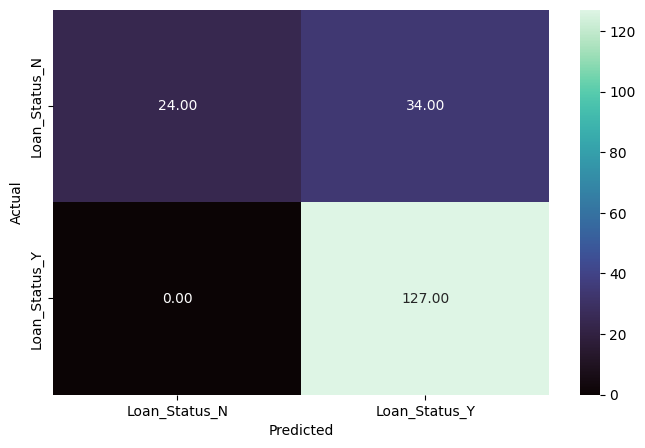

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to tune
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Instantiate the logistic regression model
lg_tuned = LogisticRegression()

# Instantiate GridSearchCV with the logistic regression model and hyperparameter grid
grid_search = GridSearchCV(estimator=lg_tuned, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Checking the performance of the best model on the test dataset
print("Performance of Best Model on Test Data:")
y_pred_best = best_model.predict(x_test)
metrics_score(y_test, y_pred_best)

Before Tuning: The model had a decent performance but struggled with precision for Class 0 and recall for Class 1.

After Tuning: Hyperparameter tuning improved the model's performance, especially in:

Precision for Class 0 (Loan Rejected).

Recall for Class 1 (Loan Approved).

Overall F1-scores and accuracy.

Hyperparameter tuning helped fine-tune the balance between false positives and false negatives, resulting in a more robust model for predicting loan statuses.

#Feature Importance

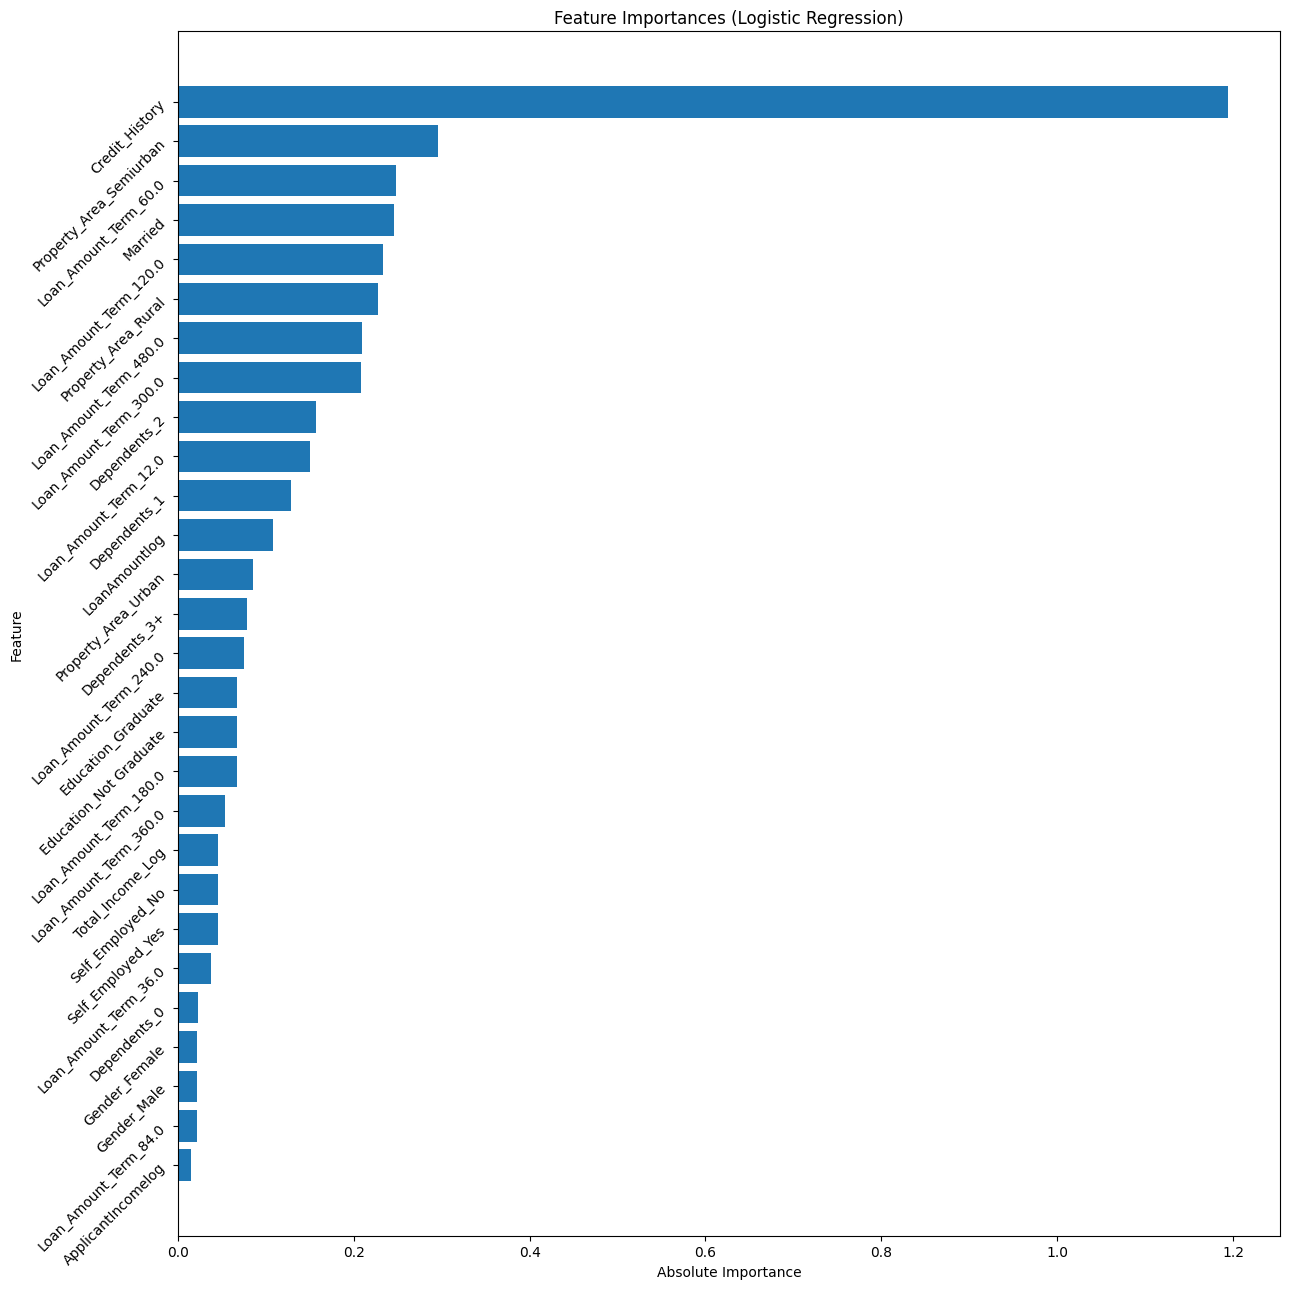

In [ ]:
# Get absolute feature coefficients
coefficients = np.abs(lg.coef_[0])
feature_names = X.columns

# Sort feature coefficients and corresponding feature names
indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[indices]
sorted_coefficients_names = np.array(feature_names)[indices]

# Convert sorted_feature_names to a list
sorted_coefficients_names = sorted_coefficients_names.tolist()

# Plotting
plt.figure(figsize=(13, 13))
plt.barh(range(X.shape[1]), sorted_coefficients, align="center")
plt.yticks(range(X.shape[1]), sorted_coefficients_names, rotation=45, ha="right")
plt.ylabel("Feature")
plt.xlabel("Absolute Importance")
plt.title("Feature Importances (Logistic Regression)")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

#Logistic Regression Coefficients

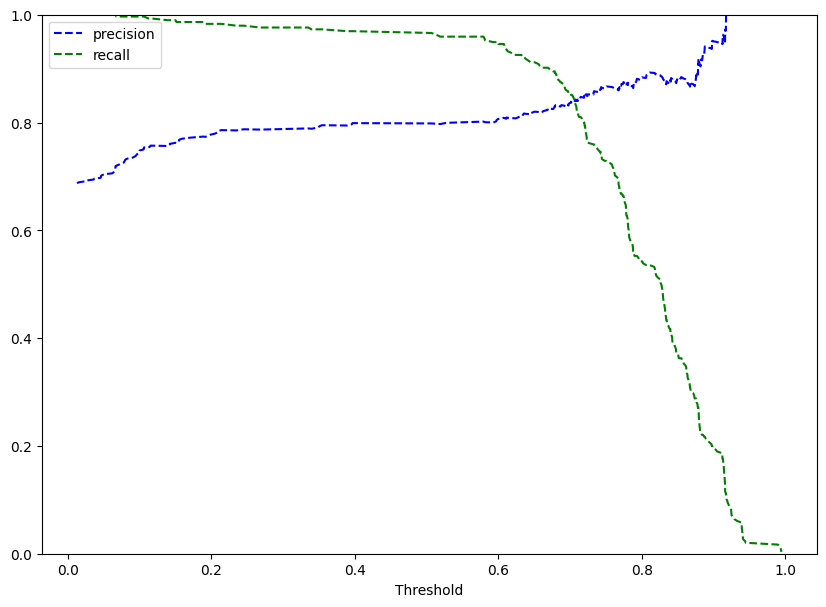

In [ ]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

y_scores_lg=lg.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
#optimal_threshold1=.70
#y_pred_train = lg.predict_proba(x_train)
#metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

In [ ]:
#optimal_threshold1=.70
#y_pred_test = lg.predict_proba(x_test)
#metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

#**Model 3 - Support Vector Machines Model**

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.89      0.43      0.58       134
           1       0.79      0.98      0.87       295

    accuracy                           0.81       429
   macro avg       0.84      0.70      0.73       429
weighted avg       0.82      0.81      0.78       429



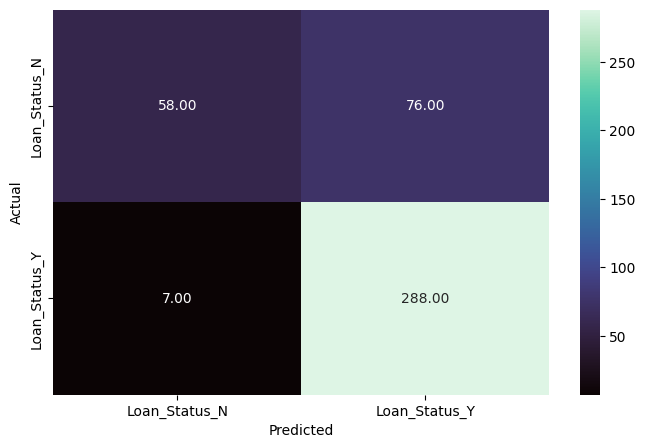

Performance on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.41      0.59        58
           1       0.79      1.00      0.88       127

    accuracy                           0.82       185
   macro avg       0.89      0.71      0.73       185
weighted avg       0.86      0.82      0.79       185



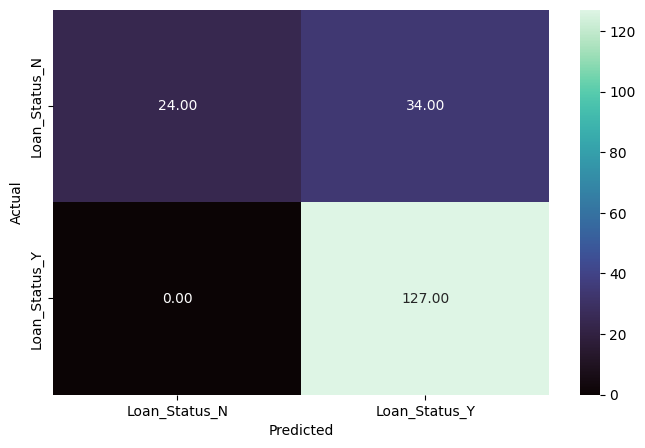

In [ ]:
from sklearn.svm import SVC

# Instantiate the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=1)

# Train the SVM model
svm_model.fit(x_train,y_train)

# Checking the performance on the training data
print("Performance on Training Data:")
y_pred_train_svm = svm_model.predict(x_train)
metrics_score(y_train, y_pred_train_svm)

#checking model performace of test data
print("Performance on Test Data:")
y_pred_test_svm = svm_model.predict(x_test)
metrics_score(y_test, y_pred_test_svm)

#Hyperparameter Tuning on SVM

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Performance on Training Data with Tuned Model:
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       134
           1       0.81      0.98      0.89       295

    accuracy                           0.83       429
   macro avg       0.86      0.74      0.77       429
weighted avg       0.84      0.83      0.81       429



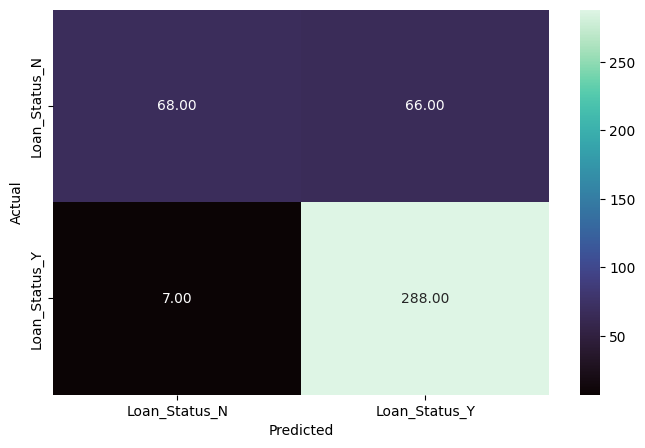

Performance on Test Data with Tuned Model:
              precision    recall  f1-score   support

           0       0.83      0.41      0.55        58
           1       0.78      0.96      0.86       127

    accuracy                           0.79       185
   macro avg       0.80      0.69      0.71       185
weighted avg       0.80      0.79      0.76       185



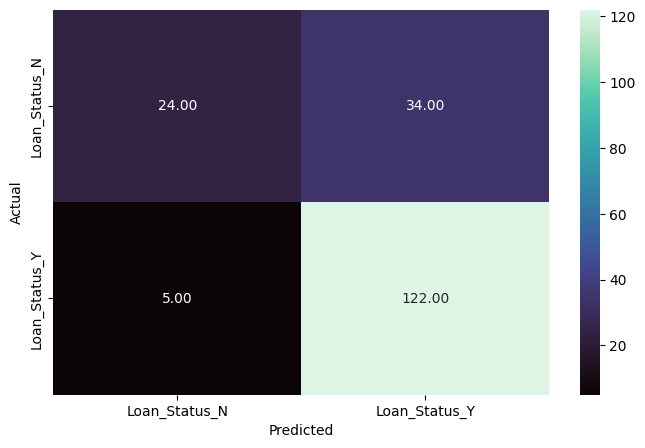

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameters and their values to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Instantiate the SVM model
svm_model_tuned = SVC(random_state=1)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svm_model_tuned, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV with training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Checking the performance on the training data with the best model
print("Performance on Training Data with Tuned Model:")
y_pred_train_tuned = best_model.predict(x_train)
metrics_score(y_train, y_pred_train_tuned)

# Checking model performance on the test data with the best model
print("Performance on Test Data with Tuned Model:")
y_pred_test_tuned = best_model.predict(x_test)
metrics_score(y_test, y_pred_test_tuned)


#Model 4 - Random Forest Classifier Model

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.94      0.36      0.52       134
           1       0.77      0.99      0.87       295

    accuracy                           0.79       429
   macro avg       0.86      0.67      0.69       429
weighted avg       0.83      0.79      0.76       429



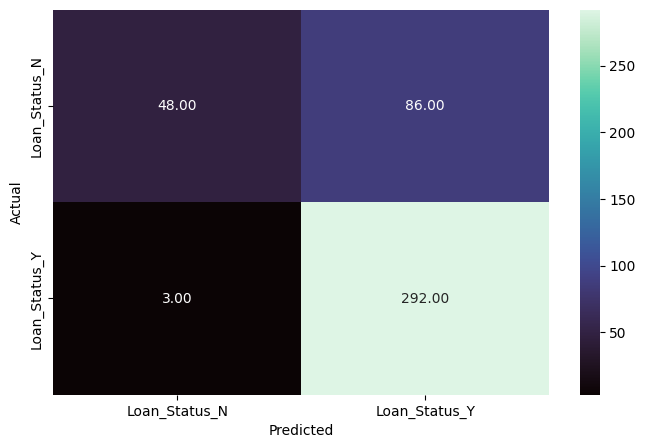

Performance on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.26      0.41        58
           1       0.75      1.00      0.86       127

    accuracy                           0.77       185
   macro avg       0.87      0.63      0.63       185
weighted avg       0.83      0.77      0.72       185



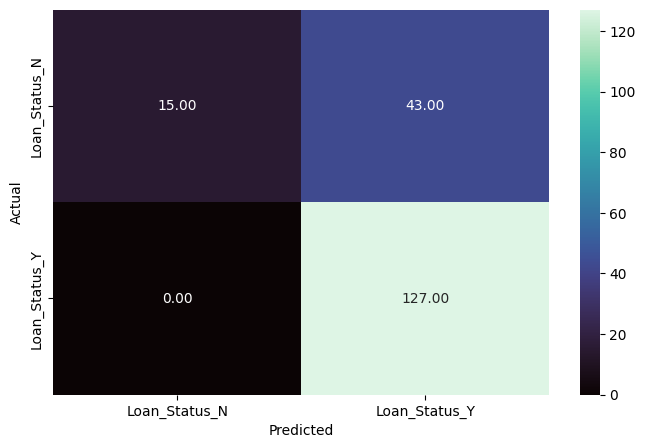

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

#checking model performace of training data
print("Performance on Training Data:")
y_pred_train_dt = rf_clf.predict(x_train)
metrics_score(y_train, y_pred_train_dt)

#checking model performace of test data
print("Performance on Test Data:")
y_pred_test_dt = rf_clf.predict(x_test)
metrics_score(y_test, y_pred_test_dt)

#Hypertuning on Random Forest Classifier

Performance on Train Data (Tuned Random Forest Model):
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       134
           1       0.81      0.98      0.89       295

    accuracy                           0.83       429
   macro avg       0.86      0.74      0.77       429
weighted avg       0.84      0.83      0.81       429



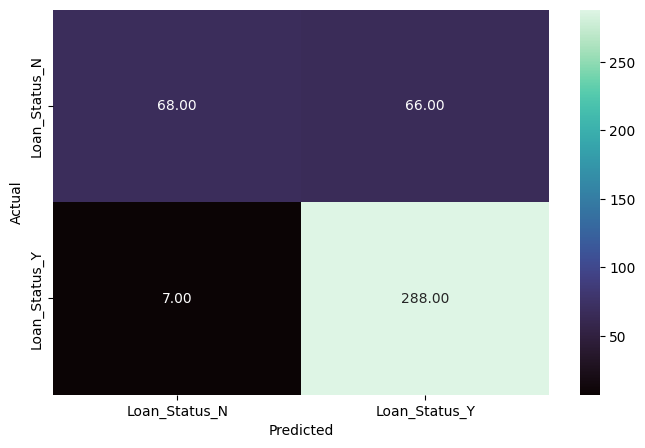

Performance on Test Data (Tuned Random Forest Model):
              precision    recall  f1-score   support

           0       0.93      0.45      0.60        58
           1       0.80      0.98      0.88       127

    accuracy                           0.82       185
   macro avg       0.86      0.72      0.74       185
weighted avg       0.84      0.82      0.79       185



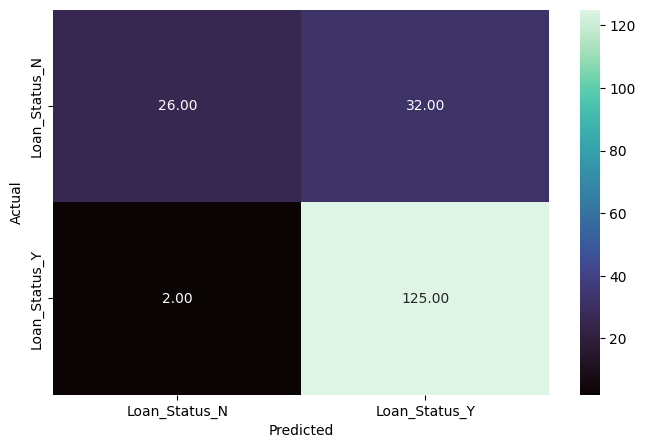

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Instantiate the Random Forest model
rf_clf = RandomForestClassifier(random_state=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to train the final Random Forest model
best_rf_model = RandomForestClassifier(random_state=1, **best_params)
best_rf_model.fit(x_train, y_train)

# Checking the performance on the test dataset using the tuned model
print("Performance on Train Data (Tuned Random Forest Model):")
y_pred_train_rf_tuned = best_rf_model.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

# Checking the performance on the test dataset using the tuned model
print("Performance on Test Data (Tuned Random Forest Model):")
y_pred_test_rf_tuned = best_rf_model.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

#Feature Importance of the Variables

Feature Importances:
                    Feature  Importance
1            Credit_History    0.390673
4          Total_Income_Log    0.127680
3             LoanAmountlog    0.121322
2        ApplicantIncomelog    0.114040
26  Property_Area_Semiurban    0.036930
25      Property_Area_Rural    0.027687
0                   Married    0.023689
12   Education_Not Graduate    0.015627
23   Loan_Amount_Term_360.0    0.015083
7              Dependents_0    0.014534
27      Property_Area_Urban    0.013275
11       Education_Graduate    0.012970
10            Dependents_3+    0.011717
6               Gender_Male    0.011105
8              Dependents_1    0.010867
24   Loan_Amount_Term_480.0    0.010712
5             Gender_Female    0.009383
9              Dependents_2    0.008400
14        Self_Employed_Yes    0.008047
13         Self_Employed_No    0.006449
20   Loan_Amount_Term_180.0    0.005237
22   Loan_Amount_Term_300.0    0.004575
18    Loan_Amount_Term_84.0    0.000000
21   Loan_Amount_Te

<Axes: xlabel='Importance', ylabel='None'>

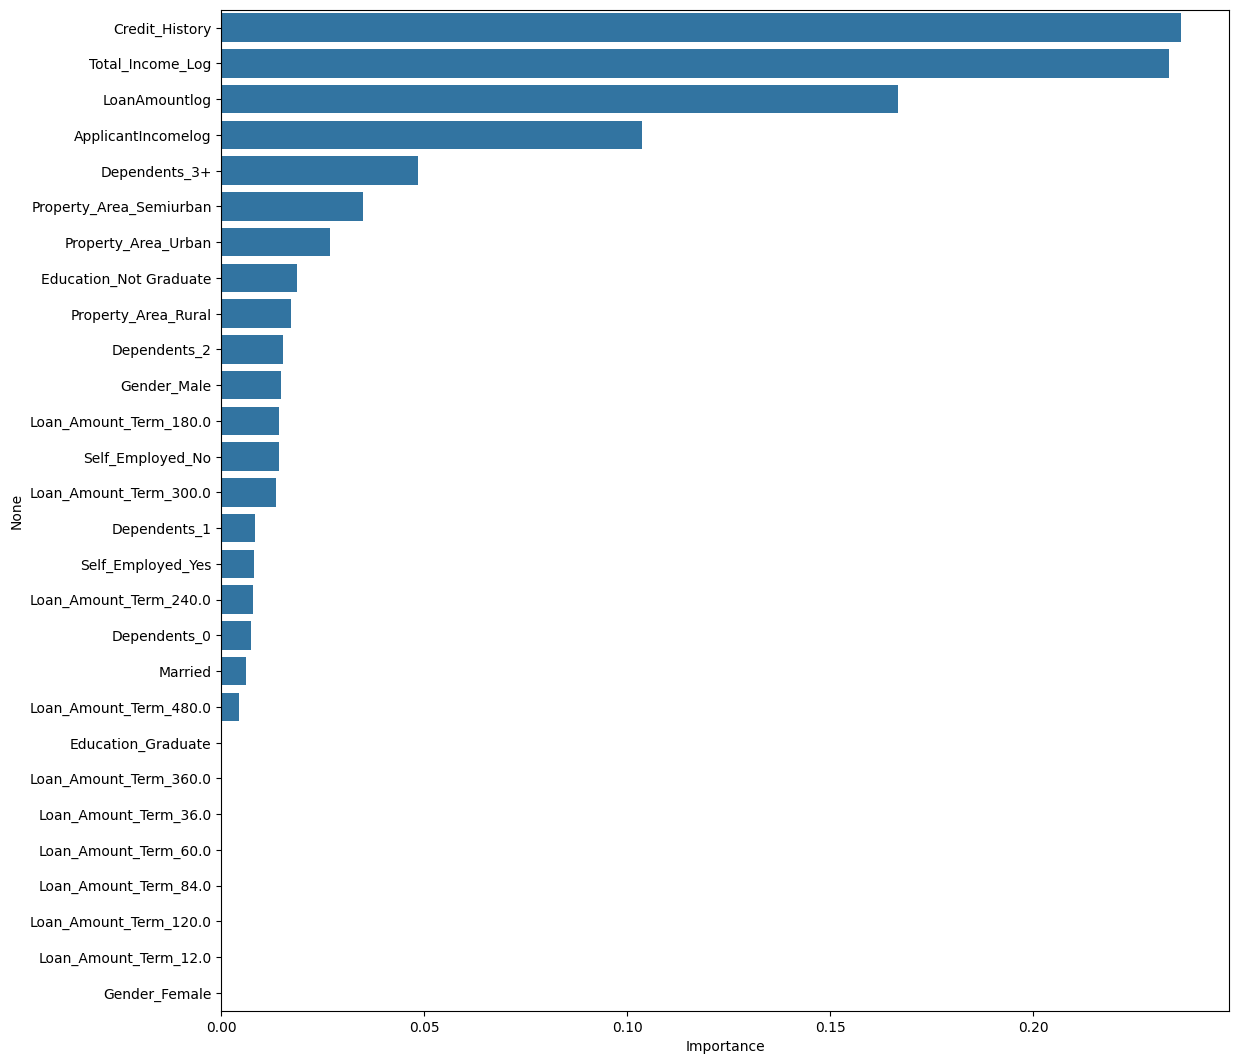

In [ ]:
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("Feature Importances:")
print(importances_df)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)